# Image Manipulations and Image Spaces

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
import os

In [3]:
# Read an image
original_image = Image.open("./test_images/100007.jpg")

# Show the image
original_image.show()

In [4]:
# Transform the image to numpy array to manipulate it
image_array = np.array(original_image)

# Inspect the image array
print(f"Shape: {image_array.shape}")
print(f"Red channel:\n{image_array[:, :, 0]}")
print(f"Green channel:\n{image_array[:, :, 1]}")
print(f"Blue channel:\n{image_array[:, :, 2]}")

Shape: (321, 481, 3)
Red channel:
[[ 55  56  57 ...  27  22  25]
 [ 51  53  55 ...  27  23  23]
 [ 53  56  60 ...  33  21  23]
 ...
 [153 152 149 ...  51  47  44]
 [186 192 190 ...  52  47  43]
 [171 170 165 ...  53  47  41]]
Green channel:
[[ 73  74  75 ...  37  32  31]
 [ 69  71  73 ...  38  32  32]
 [ 71  74  78 ...  48  33  32]
 ...
 [147 146 143 ...  52  50  47]
 [180 186 184 ...  53  48  46]
 [164 164 158 ...  53  49  44]]
Blue channel:
[[ 73  74  75 ...  29  24  27]
 [ 69  71  73 ...  32  27  27]
 [ 73  76  80 ...  45  31  29]
 ...
 [151 148 147 ...  46  41  40]
 [184 188 188 ...  45  40  39]
 [171 168 165 ...  45  38  35]]


In [5]:
# Manipulation example: make the image darker
image_array_v1 = (image_array * 0.6).astype(np.uint8)
image_v1_darker = Image.fromarray(image_array_v1)
image_v1_darker.show()

In [6]:
# Manipulation example: manipulate the red channel
image_array_v2 = image_array[:, :, 0]
image_v2 = Image.fromarray(image_array_v2)
image_v2.show()
# Why is it grey?


In [7]:

image_array_v2 = image_array.copy()
image_array_v2[:, :, 1] = 0  # Set green channel to 0
image_array_v2[:, :, 2] = 0  # Set blue channel to 0
image_v2 = Image.fromarray(image_array_v2)
image_v2.show()

In [8]:
# Transform RGB array to Lab array
from skimage.color import rgb2lab, lab2rgb

image_array_lab = rgb2lab(image_array)
# Inspect the image array
print(f"Shape: {image_array_lab.shape}")
print(f"L channel:\n{image_array_lab[:, :, 0]}")
print(f"a channel:\n{image_array_lab[:, :, 1]}")
print(f"b channel:\n{image_array_lab[:, :, 2]}")

# Transform Lab array to RGB array
image_array_rgb = lab2rgb(image_array_lab)

# Inspect the image array
print(f"Shape: {image_array_rgb.shape}")
print(f"Red channel:\n{image_array_rgb[:, :, 0]}")
print(f"Green channel:\n{image_array_rgb[:, :, 1]}")
print(f"Blue channel:\n{image_array_rgb[:, :, 2]}")

# Show the image
image = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
image.show()

Shape: (321, 481, 3)
L channel:
[[29.5586996  29.99167054 30.42367599 ... 13.50060451 11.06059437
  11.03387094]
 [27.81691004 28.68981165 29.5586996  ... 13.96354868 11.2354406
  11.2354406 ]
 [28.75769227 30.05891723 31.78046831 ... 18.48178462 11.59361739
  11.30241975]
 ...
 [61.54556334 61.10806025 60.01608738 ... 21.42062442 20.22577176
  18.89299627]
 [73.89616847 76.04183982 75.36361786 ... 21.82019967 19.52158372
  18.42680655]
 [68.13048212 67.96476658 65.88065315 ... 21.9175385  19.80572915
  17.43291089]]
a channel:
[[-7.04607063 -7.03540805 -7.02479132 ... -6.51191016 -6.63538726
  -3.81737477]
 [-7.08913302 -7.06752453 -7.04607063 ... -6.42130735 -5.41687343
  -5.41687343]
 [-6.53321146 -6.50802069 -6.4744622  ... -7.05470126 -5.82829524
  -4.87507952]
 ...
 [ 2.95842392  2.58009421  2.97329302 ... -1.78067108 -3.33866999
  -2.94003879]
 [ 2.85039568  2.46658441  2.83880087 ... -2.19457511 -2.22117176
  -2.9490557 ]
 [ 3.82416225  2.89979345  3.85029823 ... -1.73703869 -3

In [9]:
# Transform RGB to HSV
from skimage.color import rgb2hsv, hsv2rgb

image_array_hsv = rgb2hsv(image_array)
# Inspect the image array
print(f"Shape: {image_array_hsv.shape}")
print(f"H channel:\n{image_array_hsv[:, :, 0]}")
print(f"S channel:\n{image_array_hsv[:, :, 1]}")
print(f"V channel:\n{image_array_hsv[:, :, 2]}")

# Histogram equalization on the V channel
from skimage.exposure import equalize_hist

image_array_hsv[:, :, 2] = equalize_hist(image_array_hsv[:, :, 2])
print(f"V channel after equalization:\n{image_array_hsv[:, :, 2]}")

# Transform HSV to RGB
image_array_rgb = hsv2rgb(image_array_hsv)

# Show the image
image = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
image.show()

Shape: (321, 481, 3)
H channel:
[[0.5        0.5        0.5        ... 0.36666667 0.36666667 0.38888889]
 [0.5        0.5        0.5        ... 0.40909091 0.40740741 0.40740741]
 [0.51666667 0.51666667 0.51666667 ... 0.46666667 0.47222222 0.44444444]
 ...
 [0.88888889 0.94444444 0.88888889 ... 0.19444444 0.22222222 0.23809524]
 [0.88888889 0.94444444 0.88888889 ... 0.1875     0.1875     0.23809524]
 [0.83333333 0.88888889 0.83333333 ... 0.16666667 0.1969697  0.22222222]]
S channel:
[[0.24657534 0.24324324 0.24       ... 0.27027027 0.3125     0.19354839]
 [0.26086957 0.25352113 0.24657534 ... 0.28947368 0.28125    0.28125   ]
 [0.2739726  0.26315789 0.25       ... 0.3125     0.36363636 0.28125   ]
 ...
 [0.03921569 0.03947368 0.04026846 ... 0.11538462 0.18       0.14893617]
 [0.03225806 0.03125    0.03157895 ... 0.1509434  0.16666667 0.15217391]
 [0.04093567 0.03529412 0.04242424 ... 0.1509434  0.2244898  0.20454545]]
V channel:
[[0.28627451 0.29019608 0.29411765 ... 0.14509804 0.125490

# Compute Power

In [10]:
def compute_power(image):
    img = image.astype(np.float64)
    gamma = 0.7755
    w0 = 1.48169521e-6
    w_r = 2.13636845e-7
    w_g = 1.77746705e-7
    w_b = 2.14348309e-7
    
    r_pow = w_r * np.power(img[:, :, 0], gamma)
    g_pow = w_g * np.power(img[:, :, 1], gamma)
    b_pow = w_b * np.power(img[:, :, 2], gamma)
    
    return w0 + np.sum(r_pow + g_pow + b_pow)

# Compute Distortion

In [11]:
def compute_distortion(original_img,modified_img):
    if original_img.shape != modified_img.shape:
        original_img = original_img[:,:,:3]
        modified_img = modified_img[:,:,:3]

    lab_orig = color.rgb2lab(original_img)
    lab_mod = color.rgb2lab(modified_img)
    
    diff = lab_orig - lab_mod
    dist_pixel = np.sqrt(np.sum(np.square(diff), axis=2))
    total_error = np.sum(dist_pixel)
    
    h, w, _ = original_img.shape
    max_dist = np.sqrt(100**2 + 255**2 + 255**2)
    
    return (total_error / (h * w * max_dist)) * 100


In [12]:


power_result_original=compute_power(np.array(original_image))
power_result_v1=compute_power(np.array(image_v1_darker))
distortion_result=compute_distortion(np.array(original_image),np.array(image_v1_darker))

print(power_result_original)
print(power_result_v1)
print(distortion_result)

5.016254929773464
3.365048261740193
7.065601800816261


# DVS

In [13]:
def compute_pixel_current():
    raise NotImplementedError

In [14]:
def compute_panel_power():
    raise NotImplementedError

In [15]:
from typing import Tuple

def displayed_image(
        i_cell: np.ndarray,
        vdd: float,
        p1: float = 4.251e-5,
        p2: float = -3.029e-4,
        p3: float = 3.024e-5,
        orig_vdd: float = 15,
        ) -> Tuple[np.ndarray, np.ndarray]:
    """
    Display an image on the OLED display taking into account the effect of DVS.

    :param i_cell: An array of the currents drawn by each pixel of the display.
    :param vdd: The new voltage of the display.
    """
    i_cell_max = (p1 * vdd * 1) + (p2 * 1) + p3
    image_rgb_max = (i_cell_max - p3) / (p1 * orig_vdd + p2) * 255
    out = np.round((i_cell - p3) / (p1 * orig_vdd + p2) * 255)
    original_image = out.copy()

    # Clip the values exceeding `i_cell_max` to `image_rgb_max`
    out[i_cell > i_cell_max] = image_rgb_max

    return original_image.astype(np.uint8), out.astype(np.uint8)

In [16]:
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat('sample_cell_current.mat')["I_cell_sample"]

# Inspect the loaded data
print(f"Shape: {mat_data.shape}")
print(f"Red channel:\n{mat_data[:, :, 0]}")
print(f"Green channel:\n{mat_data[:, :, 1]}")
print(f"Blue channel:\n{mat_data[:, :, 2]}")

image_array_orig, image_array_w_dvs = displayed_image(mat_data, 10)
image_orig = Image.fromarray(image_array_orig)
image_orig.show()
image_w_dvs = Image.fromarray(image_array_w_dvs)
image_w_dvs.show()


Shape: (176, 220, 3)
Red channel:
[[2.46842941e-04 2.24526275e-04 2.03522353e-04 ... 9.45645098e-05
  9.45645098e-05 9.45645098e-05]
 [2.46842941e-04 2.24526275e-04 2.03522353e-04 ... 9.45645098e-05
  9.45645098e-05 9.45645098e-05]
 [2.46842941e-04 2.24526275e-04 2.03522353e-04 ... 9.45645098e-05
  9.45645098e-05 9.45645098e-05]
 ...
 [2.88850784e-04 2.78348824e-04 2.67846863e-04 ... 3.32171373e-04
  3.21669412e-04 3.21669412e-04]
 [2.88850784e-04 2.78348824e-04 2.67846863e-04 ... 3.32171373e-04
  3.32171373e-04 3.21669412e-04]
 [2.88850784e-04 2.78348824e-04 2.67846863e-04 ... 3.32171373e-04
  3.32171373e-04 3.11167451e-04]]
Green channel:
[[1.41823333e-04 1.20819412e-04 1.10317451e-04 ... 7.22478431e-05
  6.69968627e-05 6.69968627e-05]
 [1.36572353e-04 1.26070392e-04 1.10317451e-04 ... 7.22478431e-05
  6.69968627e-05 6.69968627e-05]
 [1.31321373e-04 1.20819412e-04 1.10317451e-04 ... 7.22478431e-05
  6.69968627e-05 6.69968627e-05]
 ...
 [1.73329216e-04 1.62827255e-04 1.57576275e-04 ..

In [17]:
def estimate_power_part1(img):
    return compute_power(img) 

In [18]:
def apply_hungry_blue(img, k):
    img_mod = img.astype(np.int16) #default uint8[0,255] underflow
    img_mod[:, :, 2] = img_mod[:, :, 2] - k
    img_mod = np.clip(img_mod, 0, 255) 
    return img_mod.astype(np.uint8)

In [19]:
#load images function
def load_images_from_folder(folder_path, limit=50):
    images_list = []
    
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    
    try:
        filenames = os.listdir(folder_path)
    except FileNotFoundError:
        print(f"错误: 找不到文件夹 '{folder_path}'")
        return []

    filenames.sort()

    count = 0
    print(f"正在从 {folder_path} 加载图片...")

    for filename in filenames:
        if count >= limit:
            break
        
        if filename.lower().endswith(valid_extensions):
            file_path = os.path.join(folder_path, filename)
            
            try:
                with Image.open(file_path) as img:
                    img_rgb = img.convert('RGB')
                    
                    img_array = np.array(img_rgb)
                    
                    images_list.append(img_array)
                    count += 1
                    
            except Exception as e:
                print(f"无法加载图片 {filename}: {e}")

    print(f"成功加载 {len(images_list)} 张图片。")
    return images_list

In [20]:
my_folder_path="./test_images"
images = load_images_from_folder(my_folder_path, limit=50)
screen_folder_path="./myscreen"
screen_images = load_images_from_folder(screen_folder_path, limit=5)

all_images = images + screen_images


正在从 ./test_images 加载图片...
成功加载 50 张图片。
正在从 ./myscreen 加载图片...
成功加载 5 张图片。


In [21]:
import numpy as np
import pandas as pd 

# Used to store average values for plotting
results_hungry_blue = [] 

# Used to store all detailed data for later analysis of images with "maximum/minimum" power savings
# Structure: detailed_data[k] = [ {image_index, saving, distortion}, ... ]
detailed_data = {} 

k_values = range(0, 256, 20) # Step size can be a bit larger to save time, e.g., 20

print("Running Strategy 1: Hungry Blue (detailed statistics version)...")

for k in k_values:
    # Temporary list to store results for each image at current k
    current_k_stats = []
    
    for idx, img in enumerate(images):
        # 1. calculate original power
        p_orig = estimate_power_part1(img)
        
        # 2. apply transformation
        img_new = apply_hungry_blue(img, k)
        
        # 3. calculate new power & distortion
        p_new = estimate_power_part1(img_new)
        dist = compute_distortion(img, img_new)
        
        # 4. calculate saving rate (handle division by zero)
        if p_orig > 0:
            saving = (p_orig - p_new) / p_orig * 100
        else:
            saving = 0
            
        # 5. save single image data
        current_k_stats.append({
            "idx": idx,          # remember which image
            "saving": saving,
            "dist": dist
        })

    # --- Statistics for current k ---
    all_savings = [item['saving'] for item in current_k_stats]
    all_dists = [item['dist'] for item in current_k_stats]
    
    # calculate averages for plotting Pareto curve
    avg_saving = np.mean(all_savings)
    avg_dist = np.mean(all_dists)
    
    results_hungry_blue.append((avg_dist, avg_saving))
    
    # save detailed data for later analysis
    detailed_data[k] = current_k_stats
    
    

print("Calculation completed!")

Running Strategy 1: Hungry Blue (detailed statistics version)...
Calculation completed!


In [22]:
# get summary statistics for each k
stats_list = []

for k, stats in detailed_data.items():
    savings = [s['saving'] for s in stats]
    dists = [s['dist'] for s in stats]
    
    stats_list.append({
        "Parameter (k)": k,
        "Avg Saving %": np.mean(savings),
        "Min Saving %": np.min(savings),
        "Max Saving %": np.max(savings),
        "Avg Distortion": np.mean(dists),
        "Min Distortion": np.min(dists),
        "Max Distortion": np.max(dists)
    })

df_summary = pd.DataFrame(stats_list)
# show the summary table
display(df_summary.round(2))


,Parameter (k),Avg Saving %,Min Saving %,Max Saving %,Avg Distortion,Min Distortion,Max Distortion
0,0,0.00,0.00,0.00,0.00,0.00,0.00
1,20,5.79,3.30,8.72,2.86,2.01,3.47
2,40,11.35,6.74,18.45,5.32,3.25,6.55
3,60,16.47,10.25,26.93,7.25,4.06,9.45
4,80,20.74,13.62,30.79,8.67,4.61,11.94
5,100,24.16,16.89,33.38,9.67,4.98,13.93
6,120,26.71,19.79,37.95,10.33,5.20,15.61
7,140,28.54,21.93,42.29,10.75,5.31,17.45
8,160,29.84,22.39,44.83,11.02,5.35,18.95
9,180,30.71,22.44,45.07,11.17,5.35,20.06


--- Representative Examples for k=240 ---
Max Saving: Image #49 (Saving: 45.09%)
Min Saving: Image #31 (Saving: 22.46%)


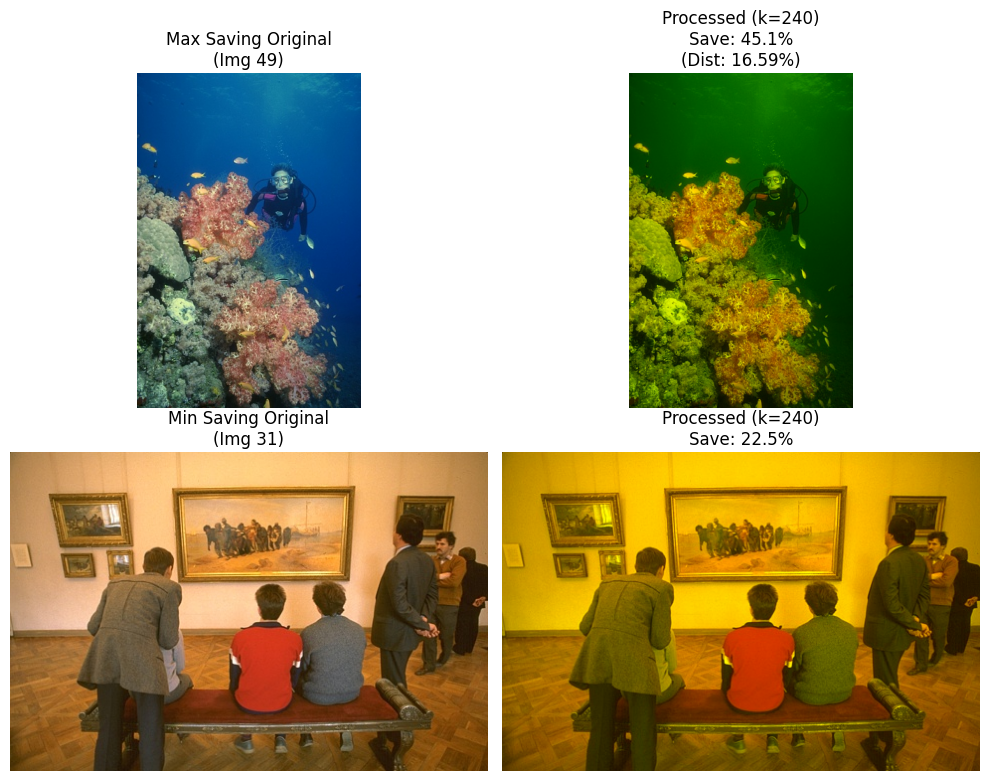

In [40]:
# select a k value to showcase, e.g., k=120
target_k = 240
if target_k in detailed_data:
    stats = detailed_data[target_k]
    
    best_img_stat = max(stats, key=lambda x: x['saving'])
    worst_img_stat = min(stats, key=lambda x: x['saving'])
    
    print(f"--- Representative Examples for k={target_k} ---")
    print(f"Max Saving: Image #{best_img_stat['idx']} (Saving: {best_img_stat['saving']:.2f}%)")
    print(f"Min Saving: Image #{worst_img_stat['idx']} (Saving: {worst_img_stat['saving']:.2f}%)")
    
    # --- Plotting ---
    import matplotlib.pyplot as plt
    
    # getting original images
    img_best_orig = images[best_img_stat['idx']]
    img_worst_orig = images[worst_img_stat['idx']]
    
    # getting processed images
    img_best_proc = apply_hungry_blue(img_best_orig, target_k)
    img_worst_proc = apply_hungry_blue(img_worst_orig, target_k)
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # saving most power
    axes[0,0].imshow(img_best_orig)
    axes[0,0].set_title(f"Max Saving Original\n(Img {best_img_stat['idx']})")
    axes[0,1].imshow(img_best_proc)
    axes[0,1].set_title(f"Processed (k={target_k})\nSave: {best_img_stat['saving']:.1f}%\n(Dist: {best_img_stat['dist']:.2f}%)")
    
    # saving least power
    axes[1,0].imshow(img_worst_orig)
    axes[1,0].set_title(f"Min Saving Original\n(Img {worst_img_stat['idx']})")
    axes[1,1].imshow(img_worst_proc)
    axes[1,1].set_title(f"Processed (k={target_k})\nSave: {worst_img_stat['saving']:.1f}%")
    
    for ax in axes.flat: ax.axis('off')
    plt.tight_layout()
    plt.show()

正在寻找失真 <= 17.0 的省电冠军...
------------------------------
找到冠军了！👑
图片编号 (Image ID): 49
使用的参数 (k): 240
省电率 (Saving): 45.09%
失真度 (Distortion): 16.59


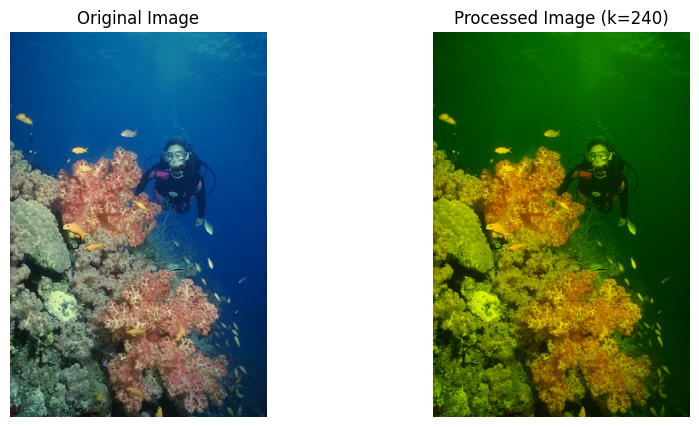

In [ ]:
#distortion limit
target_dist_limit = 17.0   # 你的限制条件：失真不能超过 5
best_candidate = None     # 擂主：一开始没人，设为 None

print(f"正在寻找失真 <= {target_dist_limit} 的省电冠军...")

# 1. 遍历每一层抽屉 (每一个 k 值)
for k, stats in detailed_data.items():
    
    # 2. 遍历这一层里的每一张图片成绩单
    for item in stats:
        
        # --- 第一步：资格审查 (Filter) ---
        if item['dist'] <= target_dist_limit:
            
            # --- 第二步：打擂台 (Find Max) ---
            # 如果擂台是空的 (best_candidate is None)
            # 或者 当前选手的省电率 (item['saving']) 比 擂主 更高
            if best_candidate is None or item['saving'] > best_candidate['saving']:
                
                # 这是一个坑：detailed_data 里原本存的 item 没有 'k' 的信息
                # 所以我们要手动把当前的 k 记下来，否则最后不知道是用哪个参数跑出来的
                best_candidate = item.copy() # 复制一份，防止改坏原始数据
                best_candidate['k'] = k      # 给它贴上 k 的标签
                
# --- 结果展示 ---
if best_candidate:
    print("-" * 30)
    print("找到冠军了！👑")
    print(f"图片编号 (Image ID): {best_candidate['idx']}")
    print(f"使用的参数 (k): {best_candidate['k']}")
    print(f"省电率 (Saving): {best_candidate['saving']:.2f}%")
    print(f"失真度 (Distortion): {best_candidate['dist']:.2f}")
    
    # 如果你想看图，可以用我们之前学的代码画出来：
    img_orig = images[best_candidate['idx']]
    img_proc = apply_hungry_blue(img_orig, best_candidate['k'])
    # ... (接着画图)
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img_orig)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(img_proc)
    axes[1].set_title(f"Processed Image (k={best_candidate['k']})")
    axes[1].axis('off')
    plt.show()

else:
    print(f"很遗憾，没有找到失真度小于 {target_dist_limit} 的图片。")

In [24]:
def apply_contrast_brightness(img, scale_v):
    # 转换到 HSV (skimage返回 0-1 float)
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = hsv[:, :, 2] * scale_v # 调整 V 通道
    hsv[:, :, 2] = np.clip(hsv[:, :, 2], 0, 1) # 限制在 0-1
    # 转回 RGB 并扩展到 0-255
    return (color.hsv2rgb(hsv) * 255).astype(np.uint8)

In [25]:
#strategy 2: Brightness Scaling 
import numpy as np
import pandas as pd

# 存储用于画 Pareto 曲线的平均值
results_contrast = []
# 存储详细数据用于生成统计表和查找代表性图片
detailed_data_contrast = {}

c_values = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5] 

print("正在运行 Strategy 2: Brightness Scaling (详细统计版)...")

for c in c_values:
    current_c_stats = []
    
    for idx, img in enumerate(images):
        p_orig = estimate_power_part1(img)
        img_new = apply_contrast_brightness(img, c)
        p_new = estimate_power_part1(img_new)
        
        if p_orig > 0:
            saving = (p_orig - p_new) / p_orig * 100
        else:
            saving = 0
            
        dist = compute_distortion(img, img_new)
        
        # 保存单张图片结果
        current_c_stats.append({
            "idx": idx,
            "saving": saving,
            "dist": dist
        })
        
    # 计算平均值 (用于画图)
    all_savings = [x['saving'] for x in current_c_stats]
    all_dists = [x['dist'] for x in current_c_stats]
    
    results_contrast.append((np.mean(all_dists), np.mean(all_savings)))
    
    # 保存详细数据到字典
    detailed_data_contrast[c] = current_c_stats

print("Strategy 2 计算完成！")

# --- 展示 Strategy 2 的统计表 ---
stats_list_cont = []
for c, stats in detailed_data_contrast.items():
    savings = [s['saving'] for s in stats]
    dists = [s['dist'] for s in stats]
    stats_list_cont.append({
        "Parameter (c)": c,
        "Avg Saving %": np.mean(savings),
        "Min Saving %": np.min(savings), # 作业要求的 Min
        "Max Saving %": np.max(savings), # 作业要求的 Max
        "Avg Distortion": np.mean(dists),
        "Min Distortion": np.min(dists),
        "Max Distortion": np.max(dists)
    })

print("\n--- Summary Table for Brightness Scaling ---")
display(pd.DataFrame(stats_list_cont).round(2))

正在运行 Strategy 2: Brightness Scaling (详细统计版)...
Strategy 2 计算完成！

--- Summary Table for Brightness Scaling ---


,Parameter (c),Avg Saving %,Min Saving %,Max Saving %,Avg Distortion,Min Distortion,Max Distortion
0,1.0,0.15,0.05,0.38,0.07,0.03,0.10
1,0.9,8.22,8.06,8.47,1.37,0.97,1.75
2,0.8,16.23,16.09,16.46,2.72,1.90,3.47
3,0.7,24.60,24.42,24.82,4.11,2.87,5.26
4,0.6,33.13,32.96,33.36,5.53,3.84,7.07
5,0.5,41.91,41.76,42.15,6.98,4.83,8.93


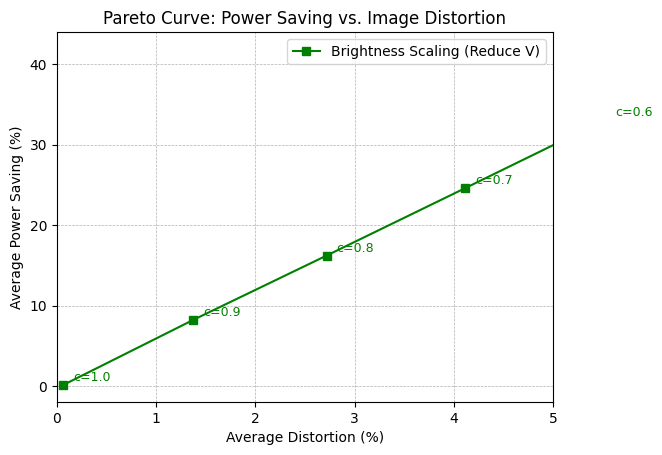

In [26]:
x_cont = [r[0] for r in results_contrast]
y_cont = [r[1] for r in results_contrast]
plt.plot(x_cont, y_cont, 'g-s', label='Brightness Scaling (Reduce V)')
for x, y, c in zip(x_cont, y_cont, c_values):
    if x < 6:
        # y+0.5 让文字稍微还在点上方
        plt.text(x + 0.1, y + 0.5, f'c={c:.1f}', color='green', fontsize=9)
plt.title('Pareto Curve: Power Saving vs. Image Distortion')
plt.xlabel('Average Distortion (%)')
plt.ylabel('Average Power Saving (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlim(0, 5) 
    
plt.show()

In [27]:
#strategy 3: Histogram Equalization
from skimage import color, exposure

# 存储用于画 Pareto 曲线的平均值
results_hist = []
# 存储详细数据
detailed_data_hist = {}

alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

print("正在运行 Strategy 3: Histogram Equalization (详细统计版)...")

for alpha in alphas:
    current_alpha_stats = []
    
    for idx, img in enumerate(images):
        p_orig = estimate_power_part1(img)
        
        # 1. 生成全均衡化图像
        hsv = color.rgb2hsv(img)
        # 注意：equalize_hist 输入输出通常是归一化的 float，转换回 uint8 需小心
        hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
        img_eq = (color.hsv2rgb(hsv) * 255).astype(np.uint8)
        
        # 2. 混合: Final = (1-alpha)*Original + alpha*Equalized
        # 确保类型转换正确，防止溢出
        img_mixed = (img * (1 - alpha) + img_eq * alpha).astype(np.uint8)
        
        p_new = estimate_power_part1(img_mixed)
        
        if p_orig > 0:
            saving = (p_orig - p_new) / p_orig * 100
        else:
            saving = 0
            
        dist = compute_distortion(img, img_mixed)
        
        current_alpha_stats.append({
            "idx": idx,
            "saving": saving,
            "dist": dist
        })
    
    # 计算平均值
    all_savings = [x['saving'] for x in current_alpha_stats]
    all_dists = [x['dist'] for x in current_alpha_stats]
    
    results_hist.append((np.mean(all_dists), np.mean(all_savings)))
    detailed_data_hist[alpha] = current_alpha_stats

print("Strategy 3 计算完成！")

# --- 展示 Strategy 3 的统计表 ---
stats_list_hist = []
for a, stats in detailed_data_hist.items():
    savings = [s['saving'] for s in stats]
    dists = [s['dist'] for s in stats]
    stats_list_hist.append({
        "Parameter (alpha)": a,
        "Avg Saving %": np.mean(savings),
        "Min Saving %": np.min(savings),
        "Max Saving %": np.max(savings),
        "Avg Distortion": np.mean(dists),
        "Min Distortion": np.min(dists),
        "Max Distortion": np.max(dists)
    })

print("\n--- Summary Table for Histogram Equalization ---")
display(pd.DataFrame(stats_list_hist).round(2))

正在运行 Strategy 3: Histogram Equalization (详细统计版)...
Strategy 3 计算完成！

--- Summary Table for Histogram Equalization ---


,Parameter (alpha),Avg Saving %,Min Saving %,Max Saving %,Avg Distortion,Min Distortion,Max Distortion
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,0.2,0.43,-7.65,5.19,0.62,0.25,1.16
2,0.4,0.63,-15.59,10.31,1.23,0.48,2.30
3,0.6,0.91,-23.34,15.62,1.84,0.72,3.47
4,0.8,1.30,-30.95,21.12,2.45,0.96,4.66
5,1.0,1.48,-38.87,26.69,3.05,1.19,5.83


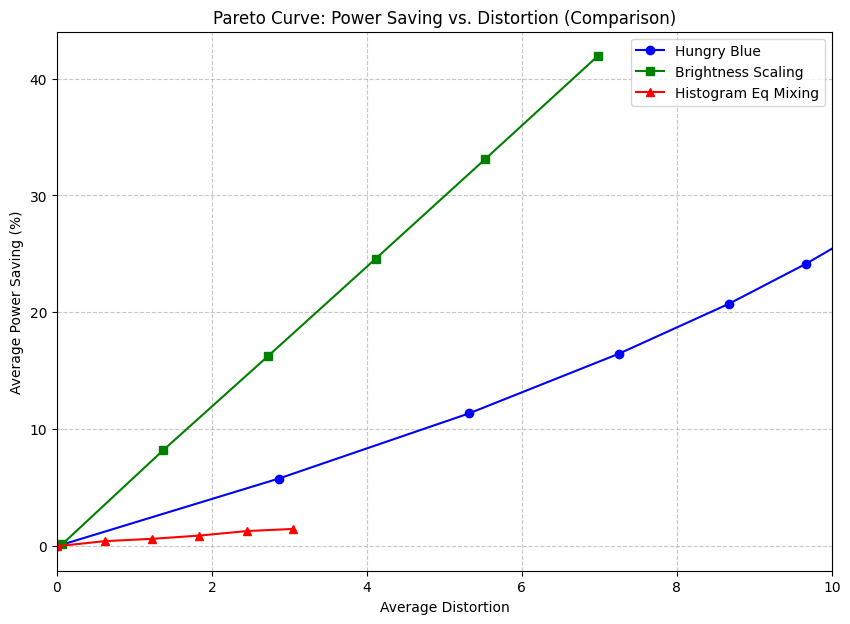

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# 1. Hungry Blue 曲线
if results_hungry_blue: # 确保数据存在
    x_blue = [r[0] for r in results_hungry_blue]
    y_blue = [r[1] for r in results_hungry_blue]
    plt.plot(x_blue, y_blue, 'b-o', label='Hungry Blue')

# 2. Brightness Scaling 曲线
if results_contrast:
    x_cont = [r[0] for r in results_contrast]
    y_cont = [r[1] for r in results_contrast]
    plt.plot(x_cont, y_cont, 'g-s', label='Brightness Scaling')

# 3. Histogram Eq 曲线
if results_hist:
    x_hist = [r[0] for r in results_hist]
    y_hist = [r[1] for r in results_hist]
    plt.plot(x_hist, y_hist, 'r-^', label='Histogram Eq Mixing')

plt.title('Pareto Curve: Power Saving vs. Distortion (Comparison)')
plt.xlabel('Average Distortion')
plt.ylabel('Average Power Saving (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 根据数据的范围调整坐标轴，让左下角（低失真区）更清晰
plt.xlim(0, 10) 
# plt.ylim(0, 50) 

plt.show()

策略三：
Unlike Hungry Blue and Brightness Scaling which systematically reduce pixel intensity (luminance) to save power, Histogram Equalization merely redistributes the pixel intensities to enhance contrast. Consequently, the net change in total luminance (and thus power consumption) is minimal or negligible on average, resulting in a very short curve on the Pareto plot.

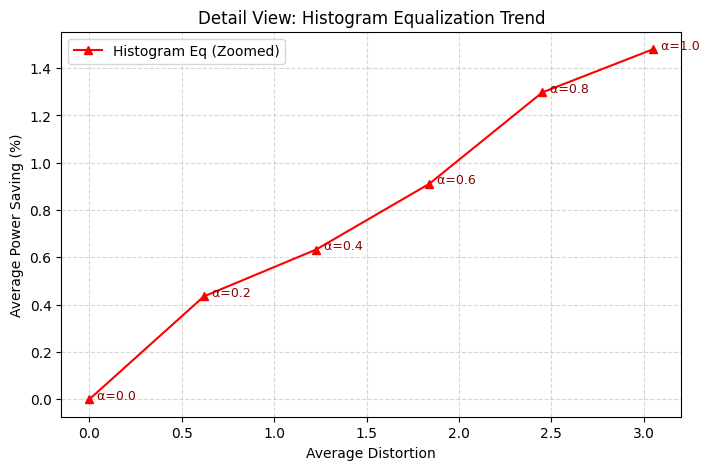

上图放大了 Strategy 3 的细节，你可以清晰看到它的走势。


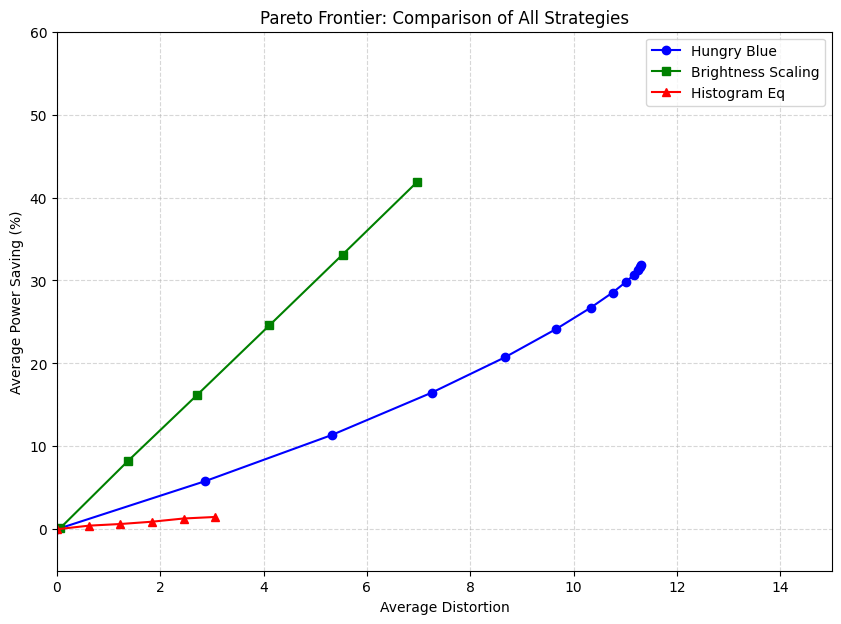

上图是最终对比图。Strategy 3 的曲线非常短小，这符合它“重新分配亮度而非单纯减去亮度”的原理。


In [29]:
import matplotlib.pyplot as plt

# --- 1. 放大细节图 (Zoomed View for Strategy 3) ---
# 这张图专门用来展示直方图均衡化的内部走势
if 'results_hist' in locals() and results_hist:
    x_hist = [r[0] for r in results_hist]
    y_hist = [r[1] for r in results_hist]

    plt.figure(figsize=(8, 5))
    plt.plot(x_hist, y_hist, 'r-^', label='Histogram Eq (Zoomed)')
    
    # 标注 alpha 值
    for x, y, a in zip(x_hist, y_hist, alphas):
        plt.text(x, y, f'  α={a:.1f}', fontsize=9, color='darkred')

    plt.title('Detail View: Histogram Equalization Trend')
    plt.xlabel('Average Distortion')
    plt.ylabel('Average Power Saving (%)')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # 让坐标轴自动适应数据范围，从而实现“放大”效果
    plt.autoscale(enable=True, axis='both', tight=False)
    plt.legend()
    plt.show()
    print("上图放大了 Strategy 3 的细节，你可以清晰看到它的走势。")
else:
    print("⚠️ 缺少 results_hist 数据，请先运行策略 3 的代码。")


# --- 2. 最终对比图 (Final Comparison - Full Scale) ---
# 这张图展示所有策略的真实比例对比
plt.figure(figsize=(10, 7))

# 绘制 Strategy 1
if 'results_hungry_blue' in locals() and results_hungry_blue:
    x_blue = [r[0] for r in results_hungry_blue]
    y_blue = [r[1] for r in results_hungry_blue]
    plt.plot(x_blue, y_blue, 'b-o', label='Hungry Blue')

# 绘制 Strategy 2
if 'results_contrast' in locals() and results_contrast:
    x_cont = [r[0] for r in results_contrast]
    y_cont = [r[1] for r in results_contrast]
    plt.plot(x_cont, y_cont, 'g-s', label='Brightness Scaling')

# 绘制 Strategy 3
if 'results_hist' in locals() and results_hist:
    # 这里不需要再次提取 x_hist, y_hist，直接复用或重新提取均可
    x_hist = [r[0] for r in results_hist]
    y_hist = [r[1] for r in results_hist]
    plt.plot(x_hist, y_hist, 'r-^', label='Histogram Eq')

plt.title('Pareto Frontier: Comparison of All Strategies')
plt.xlabel('Average Distortion')
plt.ylabel('Average Power Saving (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# 设置一个宏观的坐标范围，展示真实的“短小”对比
# 根据经验，Hungry Blue 和 Brightness 通常能达到 40-50% saving
plt.xlim(0, 15)  
plt.ylim(-5, 60) 

plt.show()
print("上图是最终对比图。Strategy 3 的曲线非常短小，这符合它“重新分配亮度而非单纯减去亮度”的原理。")

In [30]:
# 示例：修改循环逻辑以支持分类分析
results_natural = []
results_screens = []

for k in k_values:
    nat_savings, nat_dists = [], []
    scr_savings, scr_dists = [], []
    
    # 自然图像组
    for img in images:
        p_orig = estimate_power_part1(img)
        img_new = apply_hungry_blue(img, k)
        p_new = estimate_power_part1(img_new)
        nat_savings.append((p_orig - p_new) / p_orig * 100)
        nat_dists.append(compute_distortion(img, img_new))
        
    # 截图组
    for img in screen_images:
        p_orig = estimate_power_part1(img)
        img_new = apply_hungry_blue(img, k)
        p_new = estimate_power_part1(img_new)
        scr_savings.append((p_orig - p_new) / p_orig * 100)
        scr_dists.append(compute_distortion(img, img_new))
        
    results_natural.append((np.mean(nat_dists), np.mean(nat_savings)))
    results_screens.append((np.mean(scr_dists), np.mean(scr_savings)))

/Users/snow/Library/Python/3.9/lib/python/site-packages/skimage/color/colorconv.py:857: RuntimeWarning: divide by zero encountered in matmul
  return arr @ xyz_from_rgb.T.astype(arr.dtype)
/Users/snow/Library/Python/3.9/lib/python/site-packages/skimage/color/colorconv.py:857: RuntimeWarning: overflow encountered in matmul
  return arr @ xyz_from_rgb.T.astype(arr.dtype)
/Users/snow/Library/Python/3.9/lib/python/site-packages/skimage/color/colorconv.py:857: RuntimeWarning: invalid value encountered in matmul
  return arr @ xyz_from_rgb.T.astype(arr.dtype)


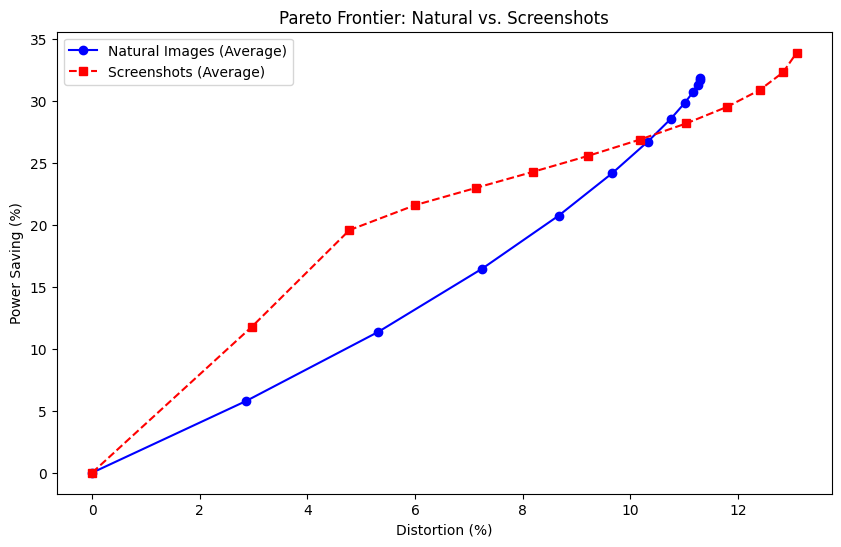

In [31]:
plt.figure(figsize=(10, 6))
# 画自然图像组
x_nat = [r[0] for r in results_natural]
y_nat = [r[1] for r in results_natural]
plt.plot(x_nat, y_nat, 'b-o', label='Natural Images (Average)')

# 画截图组
x_scr = [r[0] for r in results_screens]
y_scr = [r[1] for r in results_screens]
plt.plot(x_scr, y_scr, 'r--s', label='Screenshots (Average)')

plt.title('Pareto Frontier: Natural vs. Screenshots')
plt.xlabel('Distortion (%)')
plt.ylabel('Power Saving (%)')
plt.legend()
plt.show()

正在处理全策略对比数据...


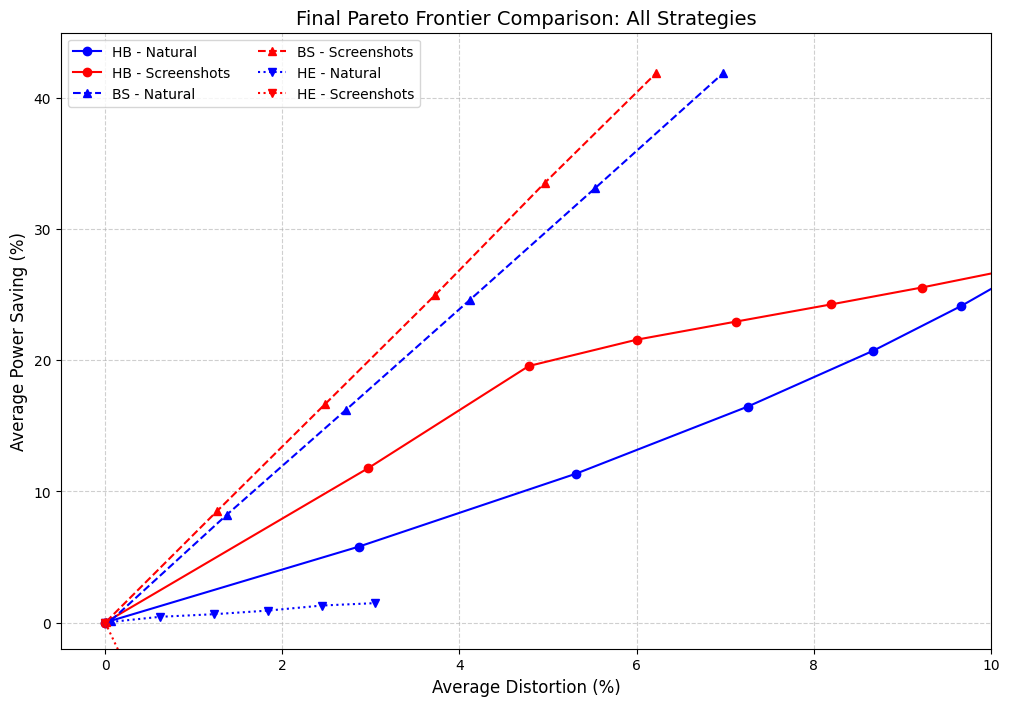

In [32]:
def run_experiment(img_list, transform_func, params):
    """通用实验运行函数：返回 (平均失真列表, 平均节能列表)"""
    avg_dists = []
    avg_savings = []
    
    for p in params:
        dists, savings = [], []
        for img in img_list:
            p_orig = estimate_power_part1(img)
            img_new = transform_func(img, p)
            p_new = estimate_power_part1(img_new)
            
            # 计算指标
            savings.append((p_orig - p_new) / p_orig * 100 if p_orig > 0 else 0)
            dists.append(compute_distortion(img, img_new))
            
        avg_dists.append(np.mean(dists))
        avg_savings.append(np.mean(savings))
    return avg_dists, avg_savings

# --- 执行实验 ---
print("正在处理全策略对比数据...")

# 1. Hungry Blue
nat_hb = run_experiment(images, apply_hungry_blue, k_values)
scr_hb = run_experiment(screen_images, apply_hungry_blue, k_values)

# 2. Brightness Scaling
nat_bs = run_experiment(images, apply_contrast_brightness, c_values)
scr_bs = run_experiment(screen_images, apply_contrast_brightness, c_values)

# 3. Histogram Equalization (混合模式)
def apply_he_wrapper(img, a):
    hsv = color.rgb2hsv(img)
    hsv_eq = hsv.copy()
    hsv_eq[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img_eq = (color.hsv2rgb(hsv_eq) * 255).astype(np.uint8)
    return (img * (1-a) + img_eq * a).astype(np.uint8)

nat_he = run_experiment(images, apply_he_wrapper, alphas)
scr_he = run_experiment(screen_images, apply_he_wrapper, alphas)

# --- 绘制最终大图 ---
plt.figure(figsize=(12, 8))

# 绘制线条逻辑：蓝色系代表自然图像，红色系代表截图
# 实线=Hungry Blue, 虚线=Brightness Scaling, 点线=Histogram Eq

# 策略 1: Hungry Blue
plt.plot(nat_hb[0], nat_hb[1], 'bo-', label='HB - Natural')
plt.plot(scr_hb[0], scr_hb[1], 'ro-', label='HB - Screenshots')

# 策略 2: Brightness Scaling
plt.plot(nat_bs[0], nat_bs[1], 'b^--', label='BS - Natural')
plt.plot(scr_bs[0], scr_bs[1], 'r^--', label='BS - Screenshots')

# 策略 3: Histogram Equalization
plt.plot(nat_he[0], nat_he[1], 'bv:', label='HE - Natural')
plt.plot(scr_he[0], scr_he[1], 'rv:', label='HE - Screenshots')

plt.xlabel('Average Distortion (%)', fontsize=12)
plt.ylabel('Average Power Saving (%)', fontsize=12)
plt.title('Final Pareto Frontier Comparison: All Strategies', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(ncol=2) # 分两列显示图例更整洁

# 设置坐标轴范围（根据你的数据微调，这里建议放大观察核心区域）
plt.xlim(-0.5, 10) 
plt.ylim(-2, 45)

plt.show()